![Imagen](itd.png)

# Analisis De Datos Masivos
## Práctica de laboratorio Verificación de velocidades de Internet
    
## Nombre Del Docente
### Jose Gabriel Rodriguez Rivas
    
## Francisco javier Favela Najera 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [16]:
df_compact=pd.read_csv('rpi_data_compact.csv')

In [17]:
df_compact.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
df_compact=df_compact.dropna()

In [23]:
df_compact

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27
...,...,...,...,...,...
667,23.073,83.97,14.18,2016-11-24,19:15:01
668,20.952,88.67,14.35,2016-11-24,19:15:32
669,19.397,84.86,14.35,2016-11-24,19:16:04
670,20.117,84.99,14.33,2016-11-24,19:16:34


In [20]:
df_compact['Ping (ms)'] = df_compact['Ping (ms)'].apply(lambda val: float(val))
df_compact['Download (Mbit/s)'] = df_compact['Download (Mbit/s)'].apply(lambda val: float(val))

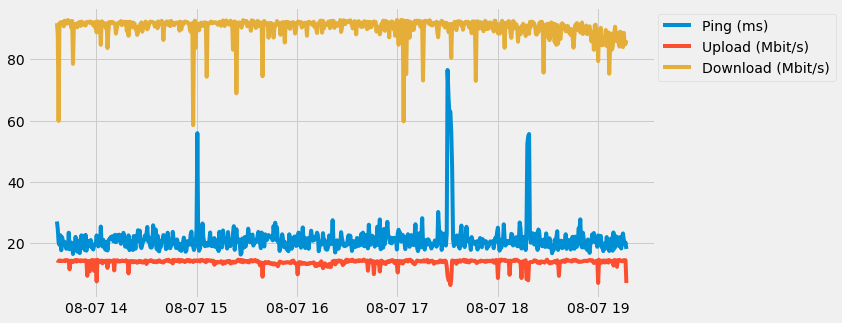

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
t = pd.to_datetime(df_compact['Time'])
ax.plot(t, df_compact['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_compact['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_compact['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.legend(bbox_to_anchor=(1.3, 1.))
plt.show()

In [25]:
acceptable_upload = 13 #Mbit/s
acceptable_download = 88 #Mbit/s
acceptable_ping = 20 #ms

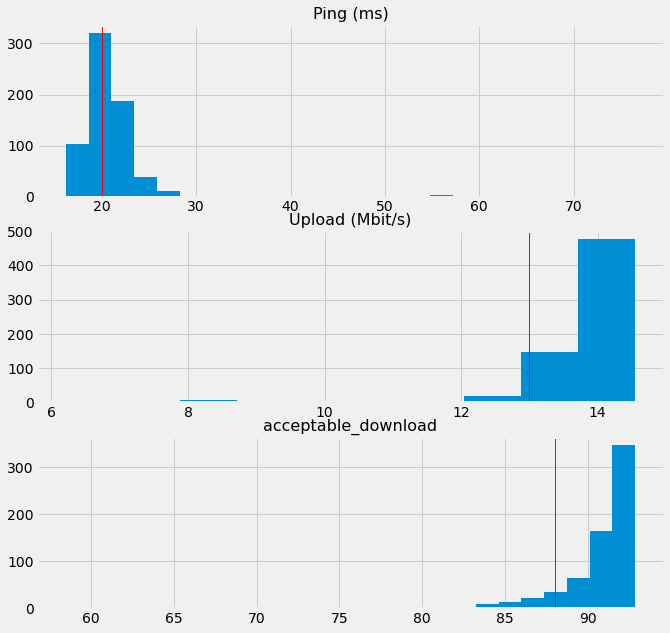

In [59]:
fig, ax = plt.subplots(3 ,figsize=(10,10))

ax[0].hist(df_compact['Ping (ms)'], 25)
# plot acceptable ping 
ax[0].axvline(acceptable_ping, color='red', linewidth=1)
ax[0].set_title('Ping (ms)', fontsize=16)
# plot upload speed
ax[1].hist(df_compact['Upload (Mbit/s)'])
# plot acceptable upload
ax[1].axvline(acceptable_upload, color='red', linewidth=1)
ax[1].set_title('Upload (Mbit/s)', fontsize=16)
# plot download speed
ax[2].hist(df_compact['Download (Mbit/s)'], 25)
# plot acceptable download
ax[2].axvline(acceptable_download, color='red', linewidth=1)
ax[2].set_title('acceptable_download', fontsize=16)

plt.show()

In [62]:
meansd = df_compact['Download (Mbit/s)'].mean()
standsd = df_compact['Download (Mbit/s)'].std()
meansu = df_compact['Upload (Mbit/s)'].mean()
standsu = df_compact['Upload (Mbit/s)'].std()
meanps = df_compact['Ping (ms)'].mean()
standsp = df_compact['Ping (ms)'].std()

In [72]:
quote_ping = (means['Ping (ms)'], stands['Ping (ms)'])
quote_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
quote_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])
print('Average ping time: {} ± {} ms'.format(*quote_ping))
print('Average Upload time: {} ± {} ms'.format(*quote_ping))
print('Average Download time: {} ± {} ms'.format(*quote_ping))

print('Distance of acceptable Ping speed from average: {:.2f} standard deviations'.format((quote_ping[0]-acceptable_ping)/quote_ping[1]))
print('Distance of acceptable Upload speed from average: {:.2f} standard deviations'.format((quote_upload[0]-acceptable_upload)/quote_upload[1]))
print('Distance of acceptable Download speed from average: {:.2f} standard deviations'.format((quote_download[0]-acceptable_download)/quote_download[1]))

TypeError: 'float' object is not subscriptable

In [73]:
print('{:.2f}% of measurements are lower than the acceptable download speed.'.format(np.sum(df_compact['Download (Mbit/s)']<acceptable_download)/float(len(df_compact))*100))
print('{:.2f}% of measurements are lower than the acceptable upload speed.'.format(np.sum(df_compact['Upload (Mbit/s)']<acceptable_upload)/float(len(df_compact))*100))
print('{:.2f}% of measurements are lower than the acceptable ping speed.'.format(np.sum(df_compact['Ping (ms)']<acceptable_ping)/float(len(df_compact))*100))

10.86% of measurements are lower than the acceptable download speed.
7.89% of measurements are lower than the acceptable upload speed.
42.86% of measurements are lower than the acceptable ping speed.


In [74]:
all_three = np.sum((df_compact['Ping (ms)']<acceptable_ping) & (df_compact['Download (Mbit/s)']<acceptable_download) & (df_compact['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% of measurements are not acceptable in three cases.'.format(all_three/float(len(df_compact))*100))

0.60% of measurements are not acceptable in three cases.


In [80]:
ping_upload = np.sum((df_compact['Ping (ms)']<acceptable_ping) & (df_compact['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% of measurements are not acceptable for ping and upload.'.format(ping_upload/float(len(df_compact))*100))

ping_download = np.sum((df_compact['Ping (ms)']<acceptable_ping) & (df_compact['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% of measurements are not acceptable for ping and download.'.format(ping_download/float(len(df_compact))*100))

upload_download = np.sum((df_compact['Upload (Mbit/s)']<acceptable_upload) & (df_compact['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% of measurements are not acceptable for ping and upload.'.format(upload_download/float(len(df_compact))*100))

2.98% of measurements are not acceptable for ping and upload.
4.61% of measurements are not acceptable for ping and download.
1.34% of measurements are not acceptable for ping and upload.
